# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [32]:
regression = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [56]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

## code here
ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)
#print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


scores=cross_val_score(linreg, X, y, cv=10,  scoring='neg_mean_squared_error')
display(np.mean(scores))

#alternately, without initial train/test split, a little more compact...
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=False)#, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
display(baseline)
#display(np.mean(scores)-baseline)

-0.1758349294225608

0.8237011324651722

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [57]:
from itertools import combinations

In [58]:
# code to find top interactions by R^2 value here
# regression = LinearRegression()
# crossvalidation = KFold(n_splits=10, shuffle=True)#, random_state=1)
import statsmodels.api as sm

interactions=[]
resultlist=[]
for c1, c2 in combinations(X.columns,2):
    #if c1 <= c2 and c1[:12]!='Neighborhood' and c2[:12]!='Neighborhood':
    if c1 <= c2:
        #print(c1,',', c2)
        X_interact = X.copy()
        X_interact[c1+'_'+c2] = X[c1] * X[c2]
        
        ##varstring = 'interact_'+c1+'_'+c2
        #print(varstring)
        ##exprstring = 'np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))'
        ##eval(varstring + '=' + exprstring)
        
        interact_ab = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
        interactions.append([interact_ab,c1+'_'+c2])
        
        
#         X_interact = sm.add_constant(X_interact)
#         model = sm.OLS(y,X_interact)
#         results = model.fit()
#         resultlist.append[[results., c1+'_'+c2]]

results.summary()

#print(sorted(interactions)[:3])

In [59]:
print(sorted(interactions)[-5:])

[[0.8254437261794813, 'LotArea_log_Neighborhood_Mitchel'], [0.8254555563770849, '1stFlrSF_log_BldgType_Duplex'], [0.8254722547789134, '1stFlrSF_log_KitchenQual_Gd'], [0.8256877982687391, 'GrLivArea_log_KitchenQual_Gd'], [0.8260420426206044, 'GrLivArea_log_KitchenQual_TA']]


It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

In [73]:
noed.columns
y

0       0.559876
1       0.212692
2       0.733795
3      -0.437232
4       1.014303
          ...   
1455    0.121392
1456    0.577822
1457    1.174306
1458   -0.399519
1459   -0.306589
Name: SalePrice_log, Length: 1460, dtype: float64

[0.41414117]
[0.15513419]


<Figure size 864x504 with 0 Axes>

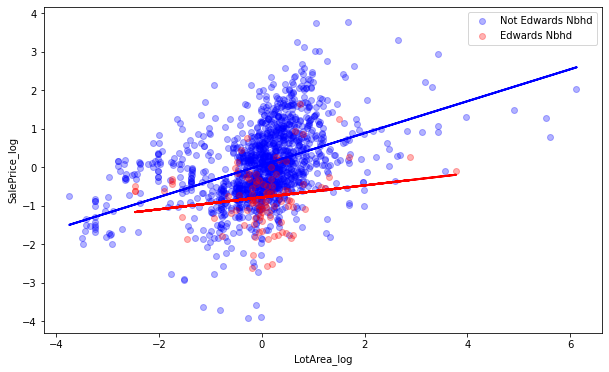

In [77]:
# Visualization code here
X2=preprocessed.copy()
noed = X2[X2['Neighborhood_Edwards']!=1]
noed.head()
#X.head()
ed = X2[X2['Neighborhood_Edwards']==1]

plt.figure(figsize=(12,7))

regression_1 = LinearRegression()
regression_2 = LinearRegression()

lot_noed = noed['LotArea_log'].values.reshape(-1, 1)
lot_ed = ed['LotArea_log'].values.reshape(-1, 1)


regression_1.fit(lot_noed, noed['SalePrice_log'])
regression_2.fit(lot_ed, ed['SalePrice_log'])

# Make predictions using the testing set
pred_1 = regression_1.predict(lot_noed)
pred_2 = regression_2.predict(lot_ed)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
############
plt.figure(figsize=(10,6))

plt.scatter(lot_noed, noed['SalePrice_log'],  color='blue', alpha = 0.3, label = 'Not Edwards Nbhd')
plt.scatter(lot_ed, ed['SalePrice_log'],  color='red', alpha = 0.3, label = 'Edwards Nbhd')

plt.plot(lot_noed, pred_1,  color='blue', linewidth=2)
plt.plot(lot_ed, pred_2,  color='red', linewidth=2)

plt.ylabel('SalePrice_log')
plt.xlabel('LotArea_log')
plt.legend();


## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [80]:
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

X_interact_2 = X.copy()
X_interact_2['lot_ed'] = X['LotArea_log'] * X['Neighborhood_Edwards']

interact_lot_ed = np.mean(cross_val_score(regression, X_interact_2, y, scoring='r2', cv=crossvalidation))
display(interact_lot_ed)




0.8188308850559454

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     156.0
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:52:30   Log-Likelihood:                -726.69
No. Observations:                1460   AIC:                             1551.
Df Residuals:                    1411   BIC:                             1810.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1465      0.261     -0.561      0.575      -0.659       0.366
LotArea_log              0.1214      0.019      6.353      0.000       0.084       0.159
1stFlrSF_log             0.1401      0.016      8.829      0.000       0.109       0.171
GrLivArea_log            0.3760      0.016     24.240      0.000       0.346       0.406
BldgType_2fmCon         -0.1785      0.078     -2.278      0.023      -0.332      -0.025
BldgType_Duplex         -0.4166      0.061     -6.803      0.000      -0.537      -0.296
BldgType_Twnhs          -0.1623      0.092     -1.761      0.079      -0.343       0.019
BldgType_TwnhsE         -0.0472      0.059     -0.797      0.425      -0.163       0.069
KitchenQual_Fa          -0.9975      0.088    -11.373      0.000      -1.170      -0.825
KitchenQual_Gd          -0.3934      0.050     -7.889      0.000      -0.491      -0.296
KitchenQual_TA          -0.6784      0.055    -12.361      0.000      -0.786      -0.571
SaleType_CWD             0.2229      0.214      1.043      0.297      -0.196       0.642
SaleType_Con             0.5797      0.302      1.920      0.055      -0.012       1.172
SaleType_ConLD           0.3132      0.154      2.032      0.042       0.011       0.616
SaleType_ConLI           0.0627      0.194      0.323      0.747      -0.318       0.443
SaleType_ConLw           0.0272      0.194      0.140      0.889      -0.354       0.408
SaleType_New             0.2999      0.078      3.831      0.000       0.146       0.453
SaleType_Oth             0.0888      0.244      0.364      0.716      -0.389       0.567
SaleType_WD              0.1716      0.065      2.647      0.008       0.044       0.299
MSZoning_FV              1.1496      0.192      5.975      0.000       0.772       1.527
MSZoning_RH              0.9027      0.193      4.678      0.000       0.524       1.281
MSZoning_RL              1.0462      0.161      6.495      0.000       0.730       1.362
MSZoning_RM              1.1090      0.151      7.363      0.000       0.814       1.405
Street_Pave             -0.2045      0.179     -1.142      0.253      -0.556       0.147
Neighborhood_Blueste     0.1381      0.316      0.437      0.662      -0.482       0.758
Neighborhood_BrDale     -0.3734      0.170     -2.191      0.029      -0.708      -0.039
Neighborhood_BrkSide    -0.6506      0.136     -4.777      0.000      -0.918      -0.383
Neighborhood_ClearCr    -0.2707      0.144     -1.882      0.060      -0.553       0.011
Neighborhood_CollgCr    -0.1055      0.118     -0.894      0.371      -0.337       0.126
Neighborhood_Crawfor    -0.1171      0.128     -0.913      0.361      -0.369       0.134
Neighborhood_Edwards    -0.7890      0.123     -6.407      0.000      -1.031      -0.547
Neighborhood_Gilbert    -0.1332      0.125     -1.062    

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [81]:
# code here
import statsmodels.api as sm
X_interact_2 = sm.add_constant(X_interact_2)
model = sm.OLS(y,X_interact_2)
results = model.fit()

results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     156.0
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:53:57   Log-Likelihood:                -726.69
No. Observations:                1460   AIC:                             1551.
Df Residuals:                    1411   BIC:                             1810.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1465      0.261     -0.561      0.575      -0.659       0.366
LotArea_log              0.1214      0.019      6.353      0.000       0.084       0.159
1stFlrSF_log             0.1401      0.016      8.829      0.000       0.109       0.171
GrLivArea_log            0.3760      0.016     24.240      0.000       0.346       0.406
BldgType_2fmCon         -0.1785      0.078     -2.278      0.023      -0.332      -0.025
BldgType_Duplex         -0.4166      0.061     -6.803      0.000      -0.537      -0.296
BldgType_Twnhs          -0.1623      0.092     -1.761      0.079      -0.343       0.019
BldgType_TwnhsE         -0.0472      0.059     -0.797      0.425      -0.163       0.069
KitchenQual_Fa          -0.9975      0.088    -11.373      0.000      -1.170      -0.825
KitchenQual_Gd          -0.3934      0.050     -7.889      0.000      -0.491      -0.296
KitchenQual_TA          -0.6784      0.055    -12.361      0.000      -0.786      -0.571
SaleType_CWD             0.2229      0.214      1.043      0.297      -0.196       0.642
SaleType_Con             0.5797      0.302      1.920      0.055      -0.012       1.172
SaleType_ConLD           0.3132      0.154      2.032      0.042       0.011       0.616
SaleType_ConLI           0.0627      0.194      0.323      0.747      -0.318       0.443
SaleType_ConLw           0.0272      0.194      0.140      0.889      -0.354       0.408
SaleType_New             0.2999      0.078      3.831      0.000       0.146       0.453
SaleType_Oth             0.0888      0.244      0.364      0.716      -0.389       0.567
SaleType_WD              0.1716      0.065      2.647      0.008       0.044       0.299
MSZoning_FV              1.1496      0.192      5.975      0.000       0.772       1.527
MSZoning_RH              0.9027      0.193      4.678      0.000       0.524       1.281
MSZoning_RL              1.0462      0.161      6.495      0.000       0.730       1.362
MSZoning_RM              1.1090      0.151      7.363      0.000       0.814       1.405
Street_Pave             -0.2045      0.179     -1.142      0.253      -0.556       0.147
Neighborhood_Blueste     0.1381      0.316      0.437      0.662      -0.482       0.758
Neighborhood_BrDale     -0.3734      0.170     -2.191      0.029      -0.708      -0.039
Neighborhood_BrkSide    -0.6506      0.136     -4.777      0.000      -0.918      -0.383
Neighborhood_ClearCr    -0.2707      0.144     -1.882      0.060      -0.553       0.011
Neighborhood_CollgCr    -0.1055      0.118     -0.894      0.371      -0.337       0.126
Neighborhood_Crawfor    -0.1171      0.128     -0.913      0.361      -0.369       0.134
Neighborhood_Edwards    -0.7890      0.123     -6.407      0.000      -1.031      -0.547
Neighborhood_Gilbert    -0.1332      0.125     -1.062    

What is your conclusion here?

In [ ]:
# formulate your conclusion
#There is a confounding relationship of lot area and Edwards-neighborhood-ness on SalePrice.
#By including this interaction, we increase the validity of our model.

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.